# CAP 6618 - Machine Learning for Computer Vision

# Programming Project 3
See guidelines on Canvas for details.

# Step 1: Setup

First, make sure that you have installed Keras on your computer.

In [14]:
# Code from https://github.com/keras-team/keras 

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

## Step 1a: Auxiliary functions

Some data manipulation and visualization functions.

Visualize Keras training accuracy and loss, given a `History` object collected from calling `fit()`.

In [16]:
# From https://keras.io/visualization/

def plot_keras_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Step 2: Load (and split) the MNIST dataset

In [2]:
# Code from https://github.com/keras-team/keras 

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# Step 3: Prepare the data

In [3]:
# Code from https://github.com/keras-team/keras 

num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Step 4: Build the first model (deep MLP) in Keras  

In [4]:
# Code from https://github.com/keras-team/keras 

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Step 5: Train the first network  

12 epochs, mini-batch size = 128 <br/>
This will take ~10 seconds per epoch on a CPU.

In [5]:
# Code from https://github.com/keras-team/keras 

batch_size = 128
epochs = 12
history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.2448 - acc: 0.9243 - val_loss: 0.1110 - val_acc: 0.9666
Epoch 2/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.1036 - acc: 0.9682 - val_loss: 0.0916 - val_acc: 0.9722
Epoch 3/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.0756 - acc: 0.9775 - val_loss: 0.0696 - val_acc: 0.9795
Epoch 4/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.0609 - acc: 0.9815 - val_loss: 0.0712 - val_acc: 0.9792
Epoch 5/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.0507 - acc: 0.9849 - val_loss: 0.0667 - val_acc: 0.9828
Epoch 6/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.0415 - acc: 0.9872 - val_loss: 0.0891 - val_acc: 0.9794
Epoch 7/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.0377 - acc: 0.9887 - val_loss: 0.0706 - val_ac

# Step 6: Evaluate performance on test set

In [6]:
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.08728501730393255
Test accuracy: 0.9847


# Step 7: Build the second model (CNN) in Keras  

In [7]:
# Code from https://github.com/keras-team/keras 

# Re-load and re-shape the dataset

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# Code from https://github.com/keras-team/keras 
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

# Step 8: Train the second network  

12 epochs, mini-batch size = 128 <br/>
<b>WARNING:</b> This will take 3-5 minutes per epoch on a CPU! You might want to reduce the value of varibale 'epochs' before training the first time and/or save the resulting model after the training is over.

In [9]:
# Code from https://github.com/keras-team/keras 

batch_size = 128
epochs = 3
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 9s 147us/step - loss: 0.2648 - acc: 0.9188 - val_loss: 0.0544 - val_acc: 0.9818
Epoch 2/3
60000/60000 [==============================] - 5s 79us/step - loss: 0.0868 - acc: 0.9745 - val_loss: 0.0433 - val_acc: 0.9847
Epoch 3/3
60000/60000 [==============================] - 5s 79us/step - loss: 0.0649 - acc: 0.9806 - val_loss: 0.0318 - val_acc: 0.9890


# Step 9: Evaluate performance on test set

In [10]:
score2 = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

10000/10000 [==============================] - 1s 79us/step
Test loss: 0.03181952691174229
Test accuracy: 0.989


## Step 9a: Analyze the training results

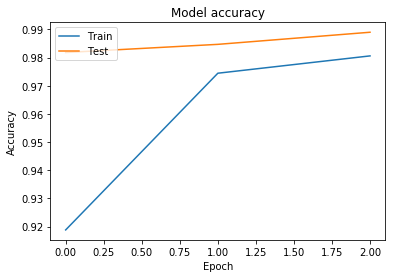

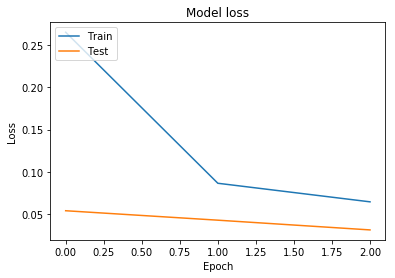

In [17]:
plot_keras_history(history2)

The graphs above show that training and test accuracy are still convering. That is a sign the network is not overfitting and we could train it for longer.

Therefore, as a first attempt to improve the accuracy we will train it for more epochs.

## Step 9b: Fine tuning

In [18]:
batch_size = 128
epochs = 10
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0537 - acc: 0.9840 - val_loss: 0.0310 - val_acc: 0.9894
Epoch 2/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0474 - acc: 0.9856 - val_loss: 0.0273 - val_acc: 0.9910
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0412 - acc: 0.9879 - val_loss: 0.0356 - val_acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0372 - acc: 0.9889 - val_loss: 0.0271 - val_acc: 0.9907
Epoch 5/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0343 - acc: 0.9892 - val_loss: 0.0278 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0310 - acc: 0.9905 - val_loss: 0.0257 - val_acc: 0.9922
Epoch 7/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0291 - acc: 0.9906 - val_loss: 0.0255 - val_acc

In [19]:
score2 = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

10000/10000 [==============================] - 1s 80us/step
Test loss: 0.02618680629127807
Test accuracy: 0.9914


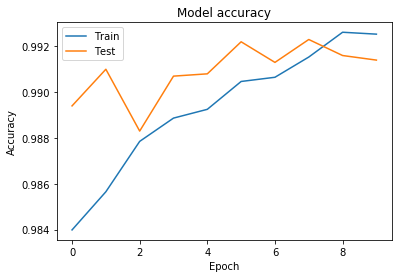

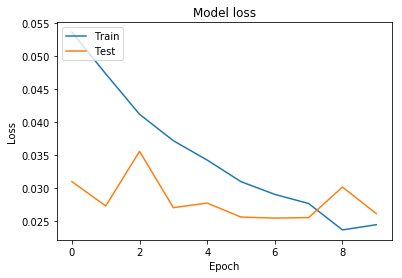

In [20]:
plot_keras_history(history2)

Now we are overfitting once we reach epoch 8 (note that the graph starts at zero).

One more attempt, training up to that epoch now.

In [27]:
batch_size = 128
epochs = 8
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 77us/step - loss: 0.0145 - acc: 0.9954 - val_loss: 0.0252 - val_acc: 0.9938
Epoch 2/8
60000/60000 [==============================] - 5s 76us/step - loss: 0.0148 - acc: 0.9953 - val_loss: 0.0317 - val_acc: 0.9927
Epoch 3/8
60000/60000 [==============================] - 5s 77us/step - loss: 0.0147 - acc: 0.9953 - val_loss: 0.0302 - val_acc: 0.9915
Epoch 4/8
60000/60000 [==============================] - 5s 76us/step - loss: 0.0135 - acc: 0.9958 - val_loss: 0.0284 - val_acc: 0.9924
Epoch 5/8
60000/60000 [==============================] - 5s 77us/step - loss: 0.0144 - acc: 0.9955 - val_loss: 0.0253 - val_acc: 0.9928
Epoch 6/8
60000/60000 [==============================] - 5s 77us/step - loss: 0.0134 - acc: 0.9959 - val_loss: 0.0272 - val_acc: 0.9925
Epoch 7/8
60000/60000 [==============================] - 5s 76us/step - loss: 0.0127 - acc: 0.9958 - val_loss: 0.0334 - val_acc: 0.992

In [28]:
score2 = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

10000/10000 [==============================] - 1s 77us/step
Test loss: 0.027652588201479898
Test accuracy: 0.9929


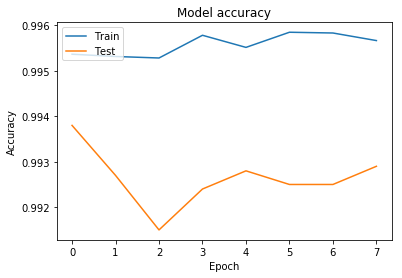

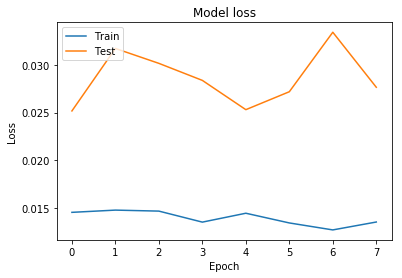

In [29]:
plot_keras_history(history2)

It did improve a bit compared to the previous test, although it is still overfitting a bit. This may be random fluctuations during training, indicating that we should stop between epochs 7 and 8.

It looks like we reached the "good enough" point for this network architecture.

From now on we will use this network as a baseline and run other experiments.

# Step 10: Build your best solution (and explain each step) 

## Use a separate notebook